In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import SVR, SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from patsy import dmatrices

In [2]:
df = pd.read_csv("C:/Users/39348/Downloads/data/df_dataset2.csv")
df_workday = pd.read_csv("C:/Users/39348/Downloads/data/df_workday_dataset2.csv")
df_holiday = pd.read_csv("C:/Users/39348/Downloads/data/df_holiday_dataset2.csv")

In [3]:
len(df)

1162

In [4]:
df.id.nunique()

85

In [5]:
# Define the feature matrix (X) and the target variable (y)
X = df.drop(columns=['howwasday_numeric'])
y = df['howwasday_numeric']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create modified versions of the training and test sets for linear regression
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

variables_to_remove = [
    'gender_Female', 'department_Business/economics', 'cohort_17-18', 
    'degree_BSc', 'residence_Trento', 'day_of_week_Monday'
]

# Remove the specified variables from X_train_linear
X_train_linear = X_train_linear.drop(columns=variables_to_remove, errors='ignore')
X_test_linear = X_test_linear.drop(columns=variables_to_remove, errors='ignore')

In [6]:
print(len(X_train))
print(len(X_test))

813
349


In [7]:
features1 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual']

features2 = ['gender_Female', 'gender_Male', 'department_Business/economics','department_Engineering and Applied Sciences', 
             'department_Humanities', 'department_Law', 'department_Medicine and veterinary medicine',
             'department_Natural Sciences', 'department_Social Sciences','cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22',
             'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+',
             'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
             'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
             'residence_Rovereto', 'residence_Trento', 'day_of_week_Friday', 'day_of_week_Monday',
             'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']

features2_linear = ['gender_Male', 'department_Engineering and Applied Sciences', 'department_Humanities', 'department_Law', 
                    'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences',
                    'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+', 
                    'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
                    'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
                    'residence_Rovereto', 'day_of_week_Friday','day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
                    'day_of_week_Tuesday', 'day_of_week_Wednesday']

features3 = ['expectday_numeric', 'mean_mood', 'max_mood', 'min_mood', 'mean_mood2']

features4 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual',
       'gender_Female', 'gender_Male', 'department_Business/economics','department_Engineering and Applied Sciences', 
       'department_Humanities', 'department_Law', 'department_Medicine and veterinary medicine',
       'department_Natural Sciences', 'department_Social Sciences','cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22',
       'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+',
       'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
       'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
       'residence_Rovereto', 'residence_Trento', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'expectday_numeric', 'mean_mood', 'max_mood', 'min_mood', 'mean_mood_morning', 'max_mood_morning', 'min_mood_morning',
       'mean_mood_afternoon', 'max_mood_afternoon', 'min_mood_afternoon','mean_mood_evening','max_mood_evening','min_mood_evening','mean_mood2']

In [8]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features1]
X_test_features = X_test_linear[features1]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     4.313
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           2.54e-14
Time:                        10:43:47   Log-Likelihood:                -905.27
No. Observations:                 813   AIC:                             1881.
Df Residuals:                     778   BIC:                             2045.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4

In [9]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features2_linear]
X_test_features = X_test_linear[features2_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.405
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           9.34e-08
Time:                        11:20:32   Log-Likelihood:                -935.36
No. Observations:                 813   AIC:                             1921.
Df Residuals:                     788   BIC:                             2038.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [10]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features3]
X_test_features = X_test_linear[features3]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     139.8
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          9.54e-107
Time:                        11:20:38   Log-Likelihood:                -721.90
No. Observations:                 813   AIC:                             1456.
Df Residuals:                     807   BIC:                             1484.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2

In [11]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.47
Mean Absolute Error (MAE): 0.53
R-squared (R²): 0.29


In [12]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.64
Mean Absolute Error (MAE): 0.60
R-squared (R²): 0.02


In [13]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.40
Mean Absolute Error (MAE): 0.45
R-squared (R²): 0.38


In [14]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.42
R-squared (R²): 0.44


In [17]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                              Feature  Importance
63                                  expectday_numeric    0.248204
64                                          mean_mood    0.236968
66                                           min_mood    0.040962
70                                mean_mood_afternoon    0.031857
72                                 min_mood_afternoon    0.029730
76                                         mean_mood2    0.027389
71                                 max_mood_afternoon    0.027075
65                                           max_mood    0.016879
73                                  mean_mood_evening    0.011806
23                                         Pexistence    0.011756
67                                  mean_mood_morning    0.011376
24                                         Pnormative    0.011082
3                                         Neuroticism    0.009948
74                                   max_mood_evening    0.009854
28        

In [18]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.46
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.53
Gradient Boosting Regressor - R-squared (R²): 0.30


In [19]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.57
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.57
Gradient Boosting Regressor - R-squared (R²): 0.14


In [20]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.37
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.43
Gradient Boosting Regressor - R-squared (R²): 0.43


In [21]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.33
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.41
Gradient Boosting Regressor - R-squared (R²): 0.50


In [22]:
# Get feature importances from the model
feature_importances = gbr_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                              Feature  Importance
63                                  expectday_numeric    0.287063
64                                          mean_mood    0.273077
76                                         mean_mood2    0.066500
66                                           min_mood    0.035746
71                                 max_mood_afternoon    0.023676
12                                           Pachieve    0.020592
3                                         Neuroticism    0.020047
72                                 min_mood_afternoon    0.016834
9                                               Pself    0.016191
70                                mean_mood_afternoon    0.015995
30                                      Interpersonal    0.013056
28                                          Bodykines    0.012742
68                                   max_mood_morning    0.011790
16                                           Pselfenh    0.011752
29        

In [23]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Regularization strength (adjust alpha as needed)
ridge_model.fit(X_train_features, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_features)

# Evaluate
print("Ridge Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge):.2f}")

Ridge Regression Results:
Mean Squared Error: 0.33
Mean Absolute Error: 0.43
R-squared: 0.50


In [24]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha for regularization strength
lasso_model.fit(X_train_features, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_features)

# Evaluate
print("Lasso Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso):.2f}")

# Identify important features
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_test_features.columns)
print("Non-Zero Coefficients in Lasso:")
print(lasso_coefficients[lasso_coefficients != 0])

Lasso Regression Results:
Mean Squared Error: 0.34
Mean Absolute Error: 0.44
R-squared: 0.48
Non-Zero Coefficients in Lasso:
Extraversion                                                                                    -6.061425e-04
Agreeableness                                                                                    3.338559e-03
Conscientiousness                                                                               -1.274777e-03
Neuroticism                                                                                     -4.446709e-03
Openness                                                                                        -2.313605e-03
Pconformity                                                                                     -9.222444e-02
Pbenov                                                                                           8.108342e-02
Punivers                                                                                        -5.516189

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features4])
X_test_scaled = scaler.transform(X_test[features4])

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a Linear Regression on PCA-transformed data
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = lr_model.predict(X_test_pca)

# Evaluate
print("PCA Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_pca):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_pca):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_pca):.2f}")

# Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

PCA Regression Results:
Mean Squared Error: 0.34
Mean Absolute Error: 0.44
R-squared: 0.48
Number of components explaining 95% variance: 45


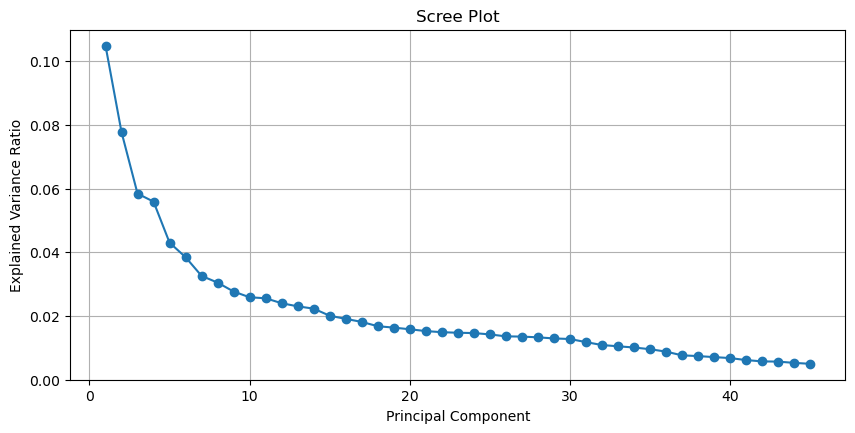

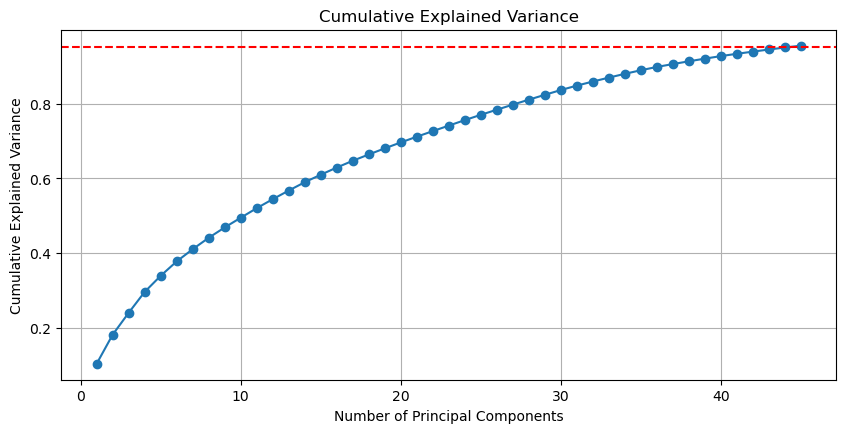

In [26]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [9]:
# Define the feature matrix (X) and the target variable (y)
X = df_workday.drop(columns=['howwasday_numeric'])
y = df_workday['howwasday_numeric']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create modified versions of the training and test sets for linear regression
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

variables_to_remove = [
    'gender_Female', 'department_Business/economics', 'cohort_17-18', 
    'degree_BSc', 'residence_Trento', 'day_of_week_Monday'
]

# Remove the specified variables from X_train_linear
X_train_linear = X_train_linear.drop(columns=variables_to_remove, errors='ignore')
X_test_linear = X_test_linear.drop(columns=variables_to_remove, errors='ignore')

In [10]:
features1 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual']

features2 = ['gender_Female', 'gender_Male', 'department_Business/economics','department_Engineering and Applied Sciences', 
             'department_Humanities', 'department_Law', 'department_Medicine and veterinary medicine',
             'department_Natural Sciences', 'department_Social Sciences','cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22',
             'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+',
             'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
             'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
             'residence_Rovereto', 'residence_Trento', 'day_of_week_Friday', 'day_of_week_Monday',
             'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']

features2_linear = ['gender_Male', 'department_Engineering and Applied Sciences', 'department_Humanities', 'department_Law', 
                    'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences',
                    'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+', 
                    'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
                    'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
                    'residence_Rovereto', 'day_of_week_Friday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']

features3 = ['expectday_numeric', 'mean_mood', 'max_mood', 'min_mood', 'mean_mood2']

features4 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual',
       'gender_Female', 'gender_Male', 'department_Business/economics','department_Engineering and Applied Sciences', 
       'department_Humanities', 'department_Law', 'department_Medicine and veterinary medicine',
       'department_Natural Sciences', 'department_Social Sciences','cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22',
       'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+',
       'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
       'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
       'residence_Rovereto', 'residence_Trento', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'expectday_numeric', 'mean_mood', 'max_mood', 'min_mood', 'mean_mood_morning', 'max_mood_morning', 'min_mood_morning',
       'mean_mood_afternoon','max_mood_afternoon','min_mood_afternoon','mean_mood_evening','max_mood_evening','min_mood_evening','mean_mood2']

In [11]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features1]
X_test_features = X_test_linear[features1]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     5.206
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.68e-17
Time:                        10:44:22   Log-Likelihood:                -522.73
No. Observations:                 520   AIC:                             1115.
Df Residuals:                     485   BIC:                             1264.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4

In [12]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features2_linear]
X_test_features = X_test_linear[features2_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.298
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           0.000776
Time:                        10:44:28   Log-Likelihood:                -578.43
No. Observations:                 520   AIC:                             1203.
Df Residuals:                     497   BIC:                             1301.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [13]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features3]
X_test_features = X_test_linear[features3]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     90.07
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           5.89e-68
Time:                        10:44:36   Log-Likelihood:                -440.02
No. Observations:                 520   AIC:                             892.0
Df Residuals:                     514   BIC:                             917.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2

In [14]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.46
Mean Absolute Error (MAE): 0.50
R-squared (R²): 0.20


In [15]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.75
Mean Absolute Error (MAE): 0.61
R-squared (R²): -0.30


In [16]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.34
Mean Absolute Error (MAE): 0.40
R-squared (R²): 0.42


In [17]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.31
Mean Absolute Error (MAE): 0.38
R-squared (R²): 0.47


In [38]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                              Feature  Importance
61                                  expectday_numeric    0.233256
62                                          mean_mood    0.215912
69                                 max_mood_afternoon    0.056080
68                                mean_mood_afternoon    0.045725
74                                         mean_mood2    0.027804
64                                           min_mood    0.023656
70                                 min_mood_afternoon    0.021299
19                                       Pexcitements    0.016543
63                                           max_mood    0.016151
65                                  mean_mood_morning    0.013698
71                                  mean_mood_evening    0.013404
72                                   max_mood_evening    0.012464
2                                   Conscientiousness    0.011769
66                                   max_mood_morning    0.011228
24        

In [18]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.46
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.51
Gradient Boosting Regressor - R-squared (R²): 0.20


In [19]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.59
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.55
Gradient Boosting Regressor - R-squared (R²): -0.02


In [20]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.34
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.43
Gradient Boosting Regressor - R-squared (R²): 0.42


In [21]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.31
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.40
Gradient Boosting Regressor - R-squared (R²): 0.47


In [43]:
# Get feature importances from the model
feature_importances = gbr_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                              Feature  Importance
61                                  expectday_numeric    0.258553
62                                          mean_mood    0.230949
69                                 max_mood_afternoon    0.077956
68                                mean_mood_afternoon    0.036300
64                                           min_mood    0.031003
2                                   Conscientiousness    0.030676
19                                       Pexcitements    0.030507
23                                         Pexistence    0.022980
24                                         Pnormative    0.016130
70                                 min_mood_afternoon    0.014478
4                                            Openness    0.014117
65                                  mean_mood_morning    0.013124
66                                   max_mood_morning    0.011306
20                                     Psuprapersonal    0.010287
74        

In [44]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Regularization strength (adjust alpha as needed)
ridge_model.fit(X_train_features, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_features)

# Evaluate
print("Ridge Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge):.2f}")

Ridge Regression Results:
Mean Squared Error: 0.26
Mean Absolute Error: 0.39
R-squared: 0.55


In [45]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha for regularization strength
lasso_model.fit(X_train_features, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_features)

# Evaluate
print("Lasso Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso):.2f}")

# Identify important features
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_test_features.columns)
print("Non-Zero Coefficients in Lasso:")
print(lasso_coefficients[lasso_coefficients != 0])

Lasso Regression Results:
Mean Squared Error: 0.27
Mean Absolute Error: 0.38
R-squared: 0.54
Non-Zero Coefficients in Lasso:
Extraversion                                                                                           -0.000153
Agreeableness                                                                                           0.001186
Conscientiousness                                                                                       0.005064
Neuroticism                                                                                            -0.006027
Openness                                                                                               -0.004435
Pconformity                                                                                            -0.235455
Ptradition                                                                                             -0.049160
Punivers                                                                            

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features4])
X_test_scaled = scaler.transform(X_test[features4])

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a Linear Regression on PCA-transformed data
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = lr_model.predict(X_test_pca)

# Evaluate
print("PCA Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_pca):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_pca):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_pca):.2f}")

# Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

PCA Regression Results:
Mean Squared Error: 0.33
Mean Absolute Error: 0.43
R-squared: 0.43
Number of components explaining 95% variance: 41


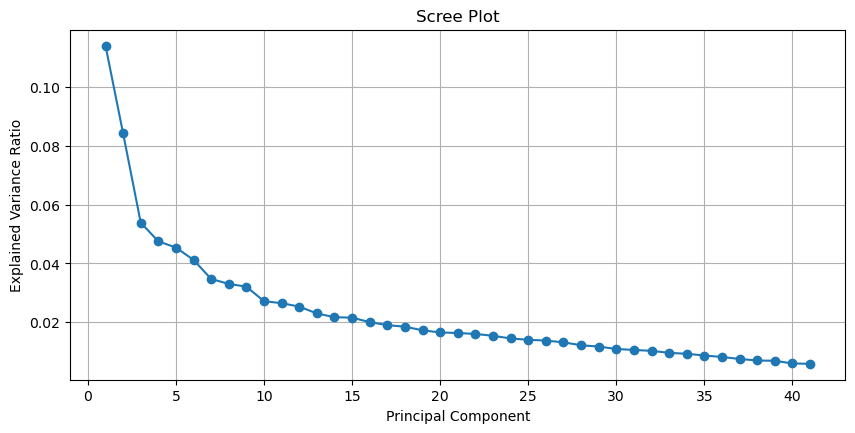

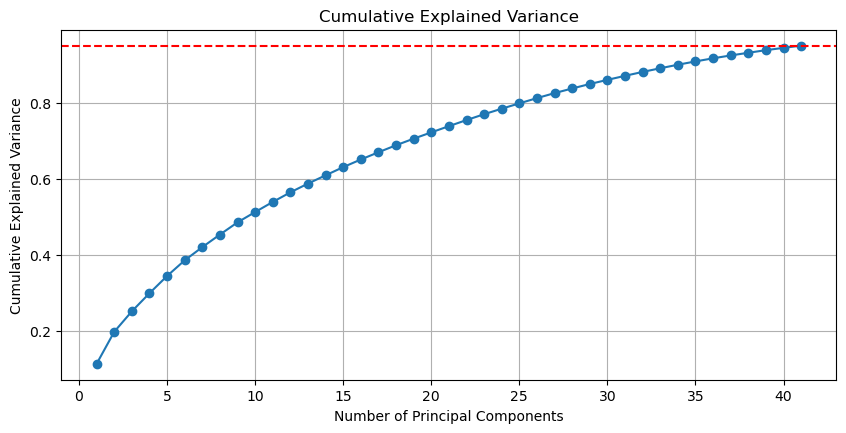

In [47]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [22]:
# Define the feature matrix (X) and the target variable (y)
X = df.drop(columns=['howwasday_numeric'])
y = df['howwasday_numeric']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create modified versions of the training and test sets for linear regression
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

variables_to_remove = [
    'gender_Female', 'department_Business/economics', 'cohort_17-18', 
    'degree_BSc', 'residence_Trento', 'day_of_week_Saturday'
]

# Remove the specified variables from X_train_linear
X_train_linear = X_train_linear.drop(columns=variables_to_remove, errors='ignore')
X_test_linear = X_test_linear.drop(columns=variables_to_remove, errors='ignore')

In [23]:
features1 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual']

features2 = ['gender_Female', 'gender_Male', 'department_Business/economics','department_Engineering and Applied Sciences', 
             'department_Humanities', 'department_Law', 'department_Medicine and veterinary medicine',
             'department_Natural Sciences', 'department_Social Sciences','cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22',
             'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+',
             'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
             'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
             'residence_Rovereto', 'residence_Trento', 'day_of_week_Saturday', 'day_of_week_Sunday']

features2_linear = ['gender_Male', 'department_Engineering and Applied Sciences', 'department_Humanities', 'department_Law', 
                    'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences',
                    'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+', 
                    'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
                    'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
                    'residence_Rovereto', 'day_of_week_Sunday']

features3 = ['expectday_numeric', 'mean_mood', 'max_mood', 'min_mood', 'mean_mood2']

features4 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual',
       'gender_Female', 'gender_Male', 'department_Business/economics','department_Engineering and Applied Sciences', 
       'department_Humanities', 'department_Law', 'department_Medicine and veterinary medicine',
       'department_Natural Sciences', 'department_Social Sciences','cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22',
       'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27+',
       'residence_Close to the city where the university is located (less than 1.30 hours of travel).',
       'residence_In another city away from where the university is located (more than 1.30 hours of travel)',
       'residence_Rovereto', 'residence_Trento', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'expectday_numeric', 'mean_mood', 'max_mood', 'min_mood', 'mean_mood_morning', 'max_mood_morning', 'min_mood_morning',
       'mean_mood_afternoon','max_mood_afternoon','min_mood_afternoon','mean_mood_evening','max_mood_evening','min_mood_evening','mean_mood2']

In [24]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features1]
X_test_features = X_test_linear[features1]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     4.313
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           2.54e-14
Time:                        10:46:07   Log-Likelihood:                -905.27
No. Observations:                 813   AIC:                             1881.
Df Residuals:                     778   BIC:                             2045.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4

In [25]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features2_linear]
X_test_features = X_test_linear[features2_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.818
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           5.84e-05
Time:                        10:46:14   Log-Likelihood:                -948.91
No. Observations:                 813   AIC:                             1938.
Df Residuals:                     793   BIC:                             2032.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [26]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features3]
X_test_features = X_test_linear[features3]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train_features).fit()

# Print the summary of the model
print("Model Summary:")
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_features)

# Evaluate the model's performance on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      howwasday_numeric   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          9.54e-107
Time:                        10:46:27   Log-Likelihood:                -721.90
No. Observations:                 813   AIC:                             1456.
Df Residuals:                     807   BIC:                             1484.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2

In [27]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.47
Mean Absolute Error (MAE): 0.53
R-squared (R²): 0.29


In [28]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.57
Mean Absolute Error (MAE): 0.57
R-squared (R²): 0.14


In [29]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.40
Mean Absolute Error (MAE): 0.45
R-squared (R²): 0.38


In [30]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_features)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.42
R-squared (R²): 0.44


In [57]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                              Feature  Importance
58                                  expectday_numeric    0.248481
59                                          mean_mood    0.239063
61                                           min_mood    0.041484
65                                mean_mood_afternoon    0.035160
71                                         mean_mood2    0.030586
67                                 min_mood_afternoon    0.030541
66                                 max_mood_afternoon    0.027859
60                                           max_mood    0.018028
68                                  mean_mood_evening    0.012397
62                                  mean_mood_morning    0.011995
24                                         Pnormative    0.011623
23                                         Pexistence    0.011408
69                                   max_mood_evening    0.010157
3                                         Neuroticism    0.009642
28        

In [31]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.46
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.53
Gradient Boosting Regressor - R-squared (R²): 0.30


In [32]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.57
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.58
Gradient Boosting Regressor - R-squared (R²): 0.13


In [33]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.37
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.43
Gradient Boosting Regressor - R-squared (R²): 0.43


In [34]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training set
gbr_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test_features)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2:.2f}")

Gradient Boosting Regressor - Mean Squared Error (MSE): 0.33
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.41
Gradient Boosting Regressor - R-squared (R²): 0.50


In [62]:
# Get feature importances from the model
feature_importances = gbr_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                              Feature    Importance
58                                  expectday_numeric  2.880399e-01
59                                          mean_mood  2.822041e-01
71                                         mean_mood2  5.535763e-02
61                                           min_mood  3.859654e-02
66                                 max_mood_afternoon  2.500335e-02
12                                           Pachieve  2.260359e-02
65                                mean_mood_afternoon  1.903240e-02
16                                           Pselfenh  1.769415e-02
30                                      Interpersonal  1.608888e-02
67                                 min_mood_afternoon  1.417826e-02
9                                               Pself  1.336481e-02
3                                         Neuroticism  1.332812e-02
63                                   max_mood_morning  1.279259e-02
29                                            Mu

In [63]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Regularization strength (adjust alpha as needed)
ridge_model.fit(X_train_features, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_features)

# Evaluate
print("Ridge Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge):.2f}")

Ridge Regression Results:
Mean Squared Error: 0.33
Mean Absolute Error: 0.43
R-squared: 0.50


In [64]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha for regularization strength
lasso_model.fit(X_train_features, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_features)

# Evaluate
print("Lasso Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso):.2f}")

# Identify important features
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_test_features.columns)
print("Non-Zero Coefficients in Lasso:")
print(lasso_coefficients[lasso_coefficients != 0])

Lasso Regression Results:
Mean Squared Error: 0.34
Mean Absolute Error: 0.44
R-squared: 0.48
Non-Zero Coefficients in Lasso:
Extraversion                                                                                    -6.061399e-04
Agreeableness                                                                                    3.338556e-03
Conscientiousness                                                                               -1.274777e-03
Neuroticism                                                                                     -4.446707e-03
Openness                                                                                        -2.313611e-03
Pconformity                                                                                     -9.222430e-02
Pbenov                                                                                           8.108346e-02
Punivers                                                                                        -5.516231

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features4])
X_test_scaled = scaler.transform(X_test[features4])

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a Linear Regression on PCA-transformed data
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = lr_model.predict(X_test_pca)

# Evaluate
print("PCA Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_pca):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_pca):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_pca):.2f}")

# Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

PCA Regression Results:
Mean Squared Error: 0.34
Mean Absolute Error: 0.44
R-squared: 0.48
Number of components explaining 95% variance: 41


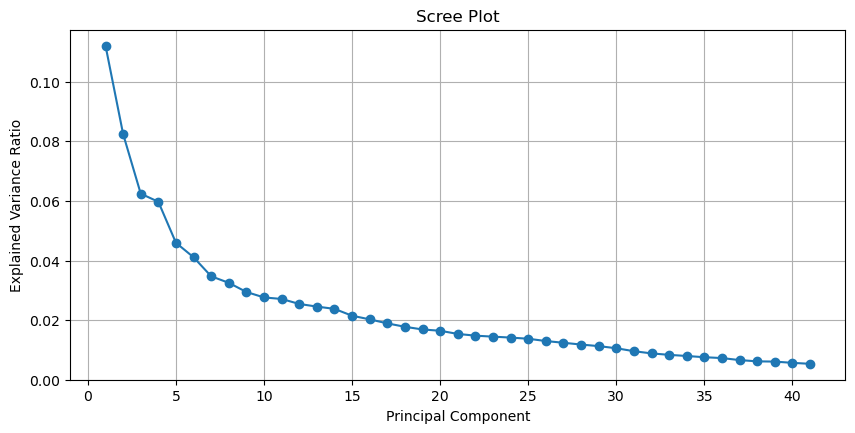

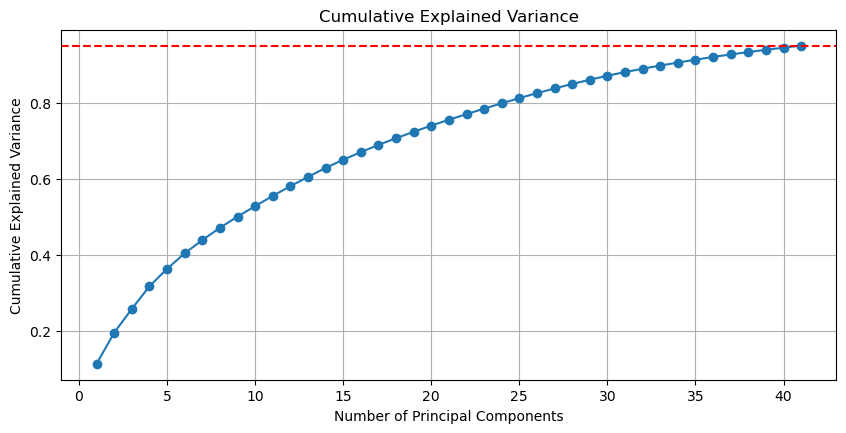

In [66]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [16]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_rows')